# Bond Biography: The Currency Sixes

## Overview: 
The Currency Sixes bonds were instrumental in financing the construction of the Transcontinental Railroads in the United States. These bonds played a crucial role in the economic development of the country during the 19th century. *(Crocker, 2014)*

## Features of the Bond: 
- **Issue Date:** The Currency Sixes were issued between 1862 and 1869.
- **Coupon Rate:** These bonds had a coupon rate of 6%, paid semi-annually.
- **Maturity Date:** The bonds had varied maturity dates, typically ranging from 10 to 30 years.
- **Principal Value:** The bonds were typically issued with a principal value of $100.
- **Call Features:** The bonds were callable after 10 years. *(Crocker, 2014)*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator
import matplotlib.transforms as transforms
from ipywidgets import interact, widgets, fixed
import numpy as np

In [2]:
prices_file_path = 'data/Macaulay_table2_railroad_bond_prices.xlsx'
yields_file_path = 'data/Macaulay_table3_railroad_bond_yields.xlsx'

bond_prices = pd.read_excel(prices_file_path)
bond_yields = pd.read_excel(yields_file_path)

bond_quant = pd.read_csv('data/BondQuant.csv')
dates = bond_quant.columns[2:]
bond_quant_long = pd.melt(bond_quant, id_vars=['L1 ID', 'Series'], value_vars=dates, var_name='Date', value_name='Quantity')
bond_quant_long['Date'] = pd.to_datetime(bond_quant_long['Date'])
bond_quant_filtered = bond_quant_long[(bond_quant_long['L1 ID'] == 40007) & (bond_quant_long['Series'] == 'Total Outstanding')]
bond_quant_filtered2 = bond_quant_long[(bond_quant_long['L1 ID'] == 40007) & (bond_quant_long['Series'] == 'Public Holdings')]

# function to clean data by dropping first row, creating a year column, converting columns to numeric and more.
def clean_bond_data(df):
    df = df.drop(0)
    df['Unnamed: 0'].fillna(method='ffill', inplace=True)
    df.rename(columns={'Unnamed: 0': 'Year'}, inplace=True) 
    df['No.'] = df['No.'].str.replace('Febuary', 'February')
    df['Date'] = pd.to_datetime(df['Year'].astype(str) + ' ' + df['No.'], errors='coerce')
    numeric_columns = [col for col in df.columns if col not in ['Year', 'No.', 'Date', 'Unnamed: 89']]
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
    return df

bond_prices = clean_bond_data(bond_prices)
bond_yields = clean_bond_data(bond_yields)

/opt/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/opt/anaconda3/lib/python3.11/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


/var/folders/mq/l3d9x9j17q37b0ngctfcb5ph0000gn/T/ipykernel_83750/1098398747.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Unnamed: 0'].fillna(method='ffill', inplace=True)
/var/folders/mq/l3d9x9j17q37b0ngctfcb5ph0000gn/T/ipykernel_83750/1098398747.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Year'].astype(str) + ' ' + df['No.'], errors='coerce')
/var/folders/mq/l3d9x9j17q37b0ngctfcb5ph0000gn/T/ipykernel_83750/1098398747.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Unnamed: 0'].fillna(method='ffill', inplace=True)
/var/folders/mq/l3d9x9j17q37b0ngctfcb5ph0000gn/T/ipykernel_83750/1098398747.py:20: UserWarning: Coul

In [3]:
notable_events = [
    {'date': '1862-07-01', 'event': 'Pacific Railway Act'},
    {'date': '1864-07-02', 'event': '1864 Amendment'},
    {'date': '1869-05-10', 'event': 'Completion of Transcontinental Railroad'},
    {'date': '1873-09-18', 'event': 'Panic of 1873'}
]

# adding notable events to bond prices and yields dataframes
def add_notable_events(df, events):
    for event in events:
        if pd.to_datetime(event['date']) not in df['Date'].values:
            df = pd.concat([df, pd.DataFrame({'Date': [pd.to_datetime(event['date'])]})], ignore_index=True)
    df = df.sort_values(by='Date').reset_index(drop=True)
    df = df.interpolate()
    return df

bond_prices = add_notable_events(bond_prices, notable_events)
bond_yields = add_notable_events(bond_yields, notable_events)

/var/folders/mq/l3d9x9j17q37b0ngctfcb5ph0000gn/T/ipykernel_83750/807474869.py:14: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate()
/var/folders/mq/l3d9x9j17q37b0ngctfcb5ph0000gn/T/ipykernel_83750/807474869.py:14: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate()


## Purpose of Issuance: 
The primary purpose of issuing the Currency Sixes was to fund the construction of the Transcontinental Railroads, which were essential for connecting the eastern and western United States. This infrastructure project facilitated trade, travel, and economic expansion across the country. *(Crocker, 2014)*

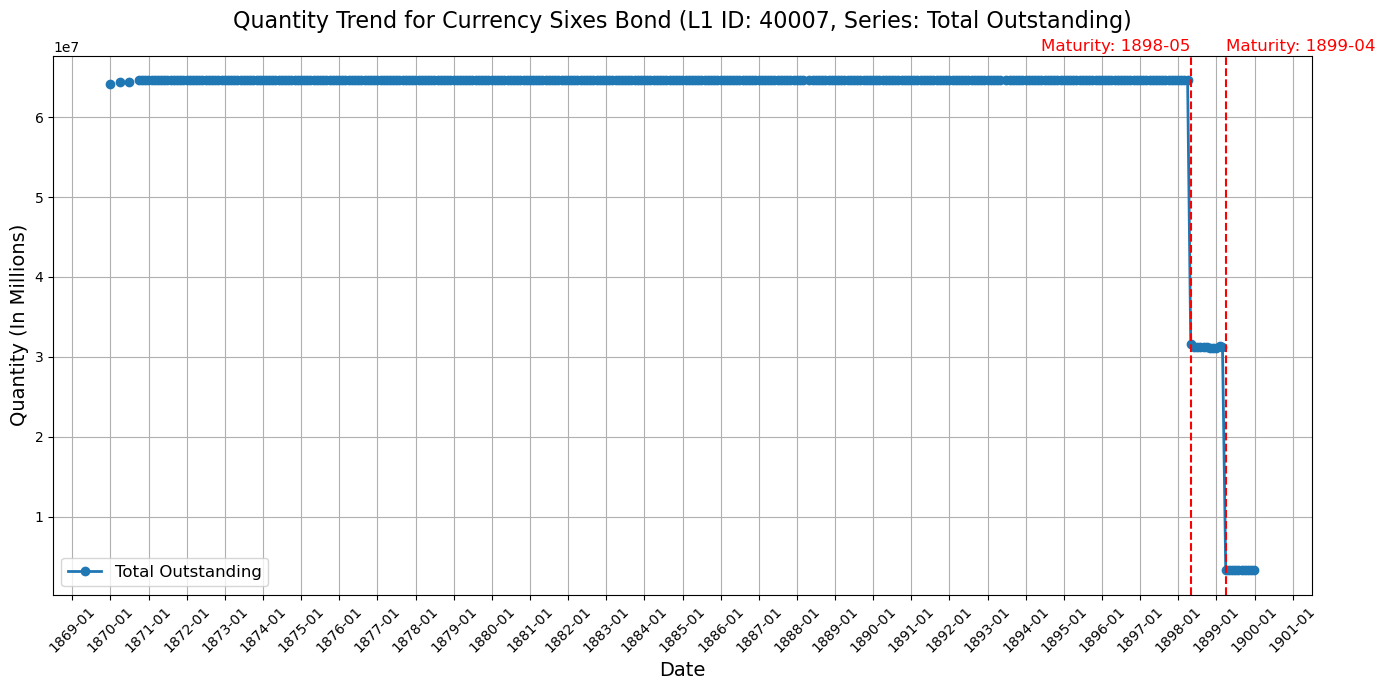

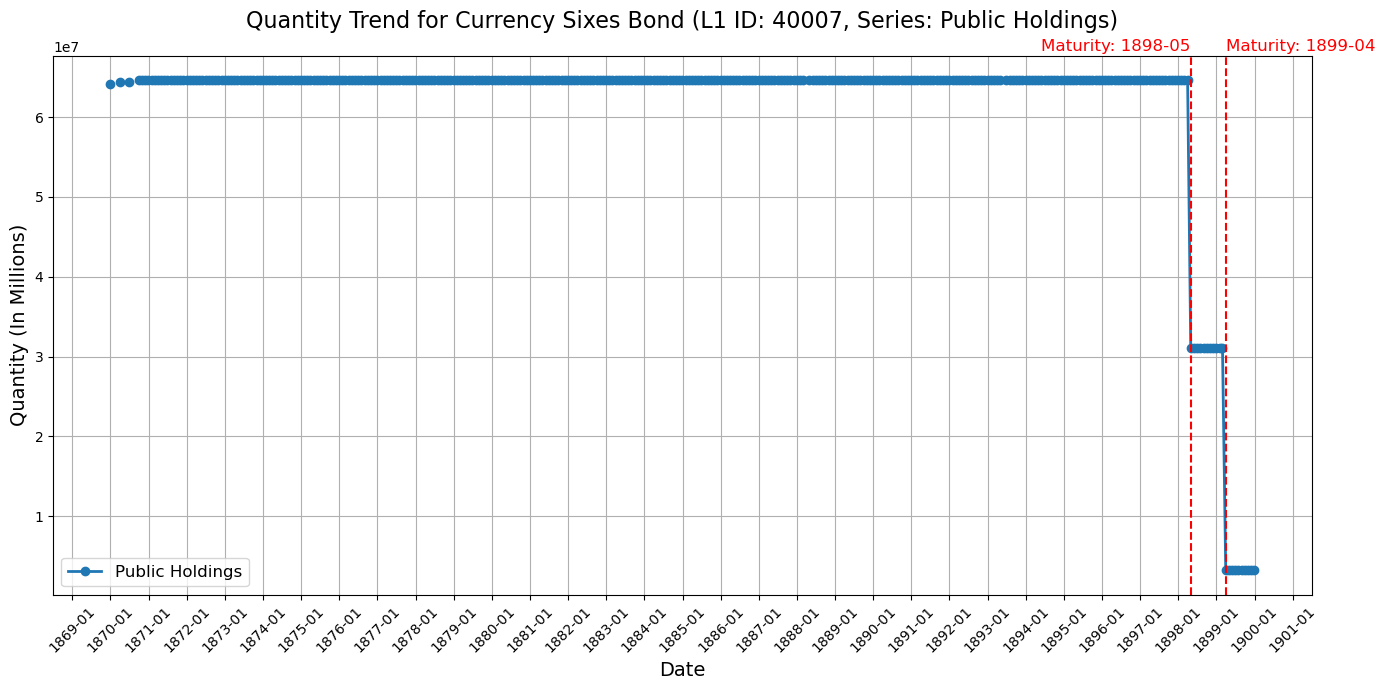

In [4]:
def plot_bond_quantities(combined_data, series_type):
    plt.figure(figsize=(14, 7))
    if series_type == 'Total Outstanding':
        plt.plot(combined_data['Date'], combined_data['Quantity'], label='Total Outstanding', linewidth=2, marker='o')
    elif series_type == 'Public Holdings':
        plt.plot(combined_data['Date'], combined_data['Quantity'], label='Public Holdings', linewidth=2, marker='o')

    plt.title(f'Quantity Trend for Currency Sixes Bond (L1 ID: 40007, Series: {series_type})', fontsize=16, pad=20)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Quantity (In Millions)', fontsize=14)

    maturity_dates = ['1898-05', '1899-04']
    y_offset = combined_data['Quantity'].max() * 0.05
    for date in maturity_dates:
        plt.axvline(pd.to_datetime(date), color='red', linestyle='--')
        plt.text(pd.to_datetime(date), combined_data['Quantity'].max() + y_offset, f'Maturity: {date}',
                 horizontalalignment='right' if date == '1898-05' else 'left',
                 color='red', fontsize=12, verticalalignment='bottom')

    plt.legend(loc='lower left', fontsize=12)
    plt.grid(True)
    plt.gca().xaxis.set_major_locator(YearLocator())
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)
    plt.subplots_adjust(left=0.1, right=0.95, top=0.85, bottom=0.15)
    plt.tight_layout()
    plt.show()

plot_bond_quantities(bond_quant_filtered, 'Total Outstanding')
plot_bond_quantities(bond_quant_filtered2, 'Public Holdings')

## Amount Authorized and Sold: 
Congress authorized a substantial amount of these bonds, with approximately $64 million in bonds being sold to finance the railroads (shown in the graphs above). The total amount sold varied over the years, reflecting the ongoing funding needs of the railroad construction. *(Treasury Direct)*

## Original Sale Price and Secondary Market Price History: 
The bonds were originally sold at par value, $100. The price trends of the Currency Sixes bonds show significant fluctuations over time, influenced by various factors including economic conditions, investor confidence, and the progress of the railroad projects. Prices in the secondary market varied, sometimes trading at a premium or discount to par value, depending on market conditions. *(Fleisig, 2010)*

## Graph Trends
For the majority of the time shown in the graphs, the quantity of the Currency Sixes bonds remains steady at around 64 million. This stability shows that there were no significant events affecting the bond quantities during this period. However, there are sudden and significant drops in the bond quantities in the late 1890s. These drops likely correspond to the bonds reaching their maturity date. Considering the 30-year maturity period for the Currency Sixes mentioned before, the sharp declines around the late 1890s make sense since these bonds were issued in the late 1850s and early 1860s.

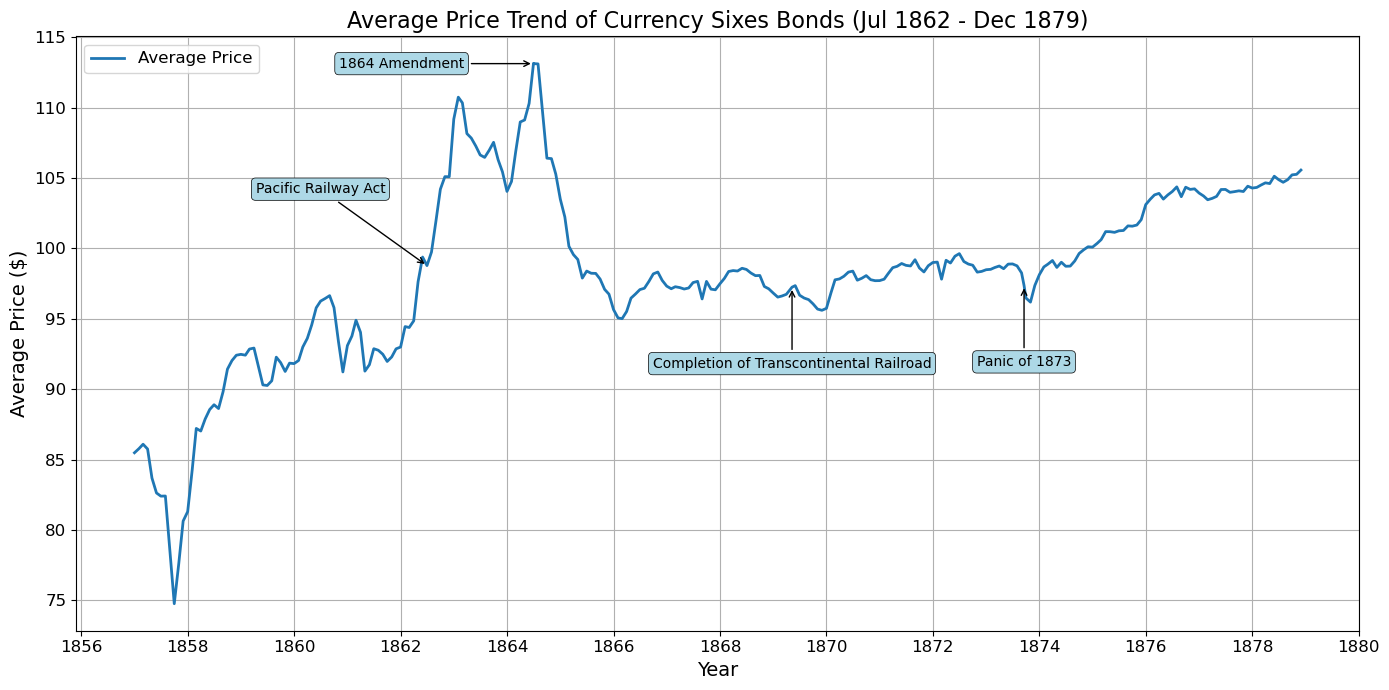

In [5]:
# function to plot average price

def plot_average_price(bond_prices, notable_events):
    avg_price = bond_prices[[col for col in bond_prices.columns if col not in ['Year', 'No.', 'Date', 'Unnamed: 89']]].mean(axis=1)
    plt.figure(figsize=(14, 7))
    line, = plt.plot(bond_prices['Date'], avg_price, label='Average Price', linewidth=2)

    annotations = {
        'Pacific Railway Act': {'xytext': (-30, 50), 'ha': 'right', 'va': 'bottom'},
        '1864 Amendment': {'xytext': (-50, 0), 'ha': 'right', 'va': 'center'},
        'Completion of Transcontinental Railroad': {'xytext': (0, -50), 'ha': 'center', 'va': 'top'},
        'Panic of 1873': {'xytext': (0, -50), 'ha': 'center', 'va': 'top'}
    }

    for event in notable_events:
        event_date = pd.to_datetime(event['date'])
        y_pos = avg_price[bond_prices['Date'] == event_date].values[0]
        annotation = annotations.get(event['event'], {'xytext': (0, 10), 'ha': 'center', 'va': 'center'})
        plt.annotate(event['event'], xy=(event_date, y_pos), xytext=annotation['xytext'],
                     textcoords='offset points', ha=annotation['ha'], va=annotation['va'],
                     arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
                     bbox=dict(boxstyle="round,pad=0.3", fc="lightblue", ec="black", lw=0.5))
    plt.title('Average Price Trend of Currency Sixes Bonds (Jul 1862 - Dec 1879)', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Average Price ($)', fontsize=14)
    plt.legend(handles=[line], loc='upper left', fontsize=12)
    plt.grid(True)
    plt.gca().xaxis.set_major_locator(YearLocator(2))
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()
    
plot_average_price(bond_prices, notable_events)

## Notable Events:
- **Pacific Railway Act - July 1st, 1862:** This act facilitated the issuance of bonds to finance the construction of the Transcontinental Railroad.
- **1864 Amendment to the Pacific Railway Act - July 2nd, 1864:** This amendment provided additional support and resources for the railroad construction, impacting the allocation and issuance of bonds.
- **Completion of the Transcontinental Railroad - May 10, 1869:** The successful completion of the railroad projects boosted investor confidence and supported the bond prices.
- **Panic of 1873 - September 18, 1873:** This financial crisis led to significant fluctuations in bond prices as investors reacted to the economic downturn.

## Notable Events Impact:
After the Pacific Railway Act, the Transcontinental Railroad average bond prices increased due to the increased governmental aid that was provided. Because investing in a seemingly "risky" project was not appealing, by providing government backing, there was more credibility and reduced risk for investors. 

After the 1864 Amendment which provided more government support for the building and ultimate completion of the railroad, the average bond prices peaked and fell. Because there were more opportunities for railroad companies to issue more bonds and begin selling land associated with the tracks, there was increased speculation. This could have lead to an oversupply of bonds for investors- that is, there were too many shares and not enough buyers. In order to attract enough investors to continue financing the completion of the railroads, the price most likely declined. 

Further, many railroad companies were tied up in the Credit Mobilier Scandal of 1864-1867 where executives at Union Pacific overcharged railroad construction fees and manipulated contracts *(History.com Editors, 2022)*. This was in part a move to take advantage of a naive Congress that had become lenient in providing aid to the project. 

## Redemption: 
The Currency Sixes were eventually redeemed by the U.S. government, typically at par value. The redemption of these bonds was a significant financial event, marking the completion of the funding for the Transcontinental Railroads. *(Crocker, 2014), (Vance, 2024)*

## Investors 

The Currency Sixes were purchased by a variety of investors, each drawn by the marketed security and stability of these bonds.

### The American Man 
- In reality, an investment in a Transcontinental Railroad during the middle of a Civil War was risky. However, Congress needed to complete 1,912 miles, thus turning to the average investor of the colonies. These were investors deemed, "naive" that latched onto the idea of revolutionizing technology. *(O'Toole 2019)*

### Large Private Investors 
- The most obvious investors remained at the helms of their railroad companies. The "Big Four": Leland Stanford, Collis P. Huntington, Mark Hopkins, and Charles Crocker were known for massively promoting their respective railway lines. They ended up uniting forces to establish their own construction company and inflated amounts to turn a profit.
#### Leland Stanford 
A classic Western tale, Stanford traveled to Sacramento, CA to run a family business. After striking it rich through a gold mine stock, Stanford turned to investing in the railroad scheme proposed by Theodore Judah.
#### Collis P. Huntington
Huntington had his start by marketing supplies to gold miners in California. Eventually, after getting into politics, he too bought into Judah's scheme. Huntington was the briber; always manipulating Congressmen to lean in favor of providing aid for the Southern Pacific branch of the railroad. *(PBS)*.
#### Charles Crocker 
Charles Crocker was a merchant before joining politics and aligning himself with future business partners Stanford and Huntington. Huntington was the one who proposed Crocker begin investing in the railroad and eventually sat on the board to oversee construction. *(PBS)*. 
#### Mark Hopkins 
Similar to Huntington, Hopkins got his start selling supplies and opening a grocery store. After an early partnership with Huntington, the two continued their relationship deep into the railroad ventures. *(Ratliff)*. 

### A Gullible Congress 
Although there were many larger investors coupled with mid-sized investments from the public, Congress also played a large role in buying into this project. Congress's willingness to provide tax dollars and resources to fund construction efforts. Unfortunately, the Big Four became embroiled in the Credit Mobilier Scandal and Congress gave no more loans to construction in the nineteenth centur. 

## Yield Trends:
The yield trends of the Currency Sixes bonds reflect the return on investment for bondholders. These trends were influenced by various factors, including economic conditions, investor sentiment, and the progress of the railroad projects. *(Weidenmier)* 

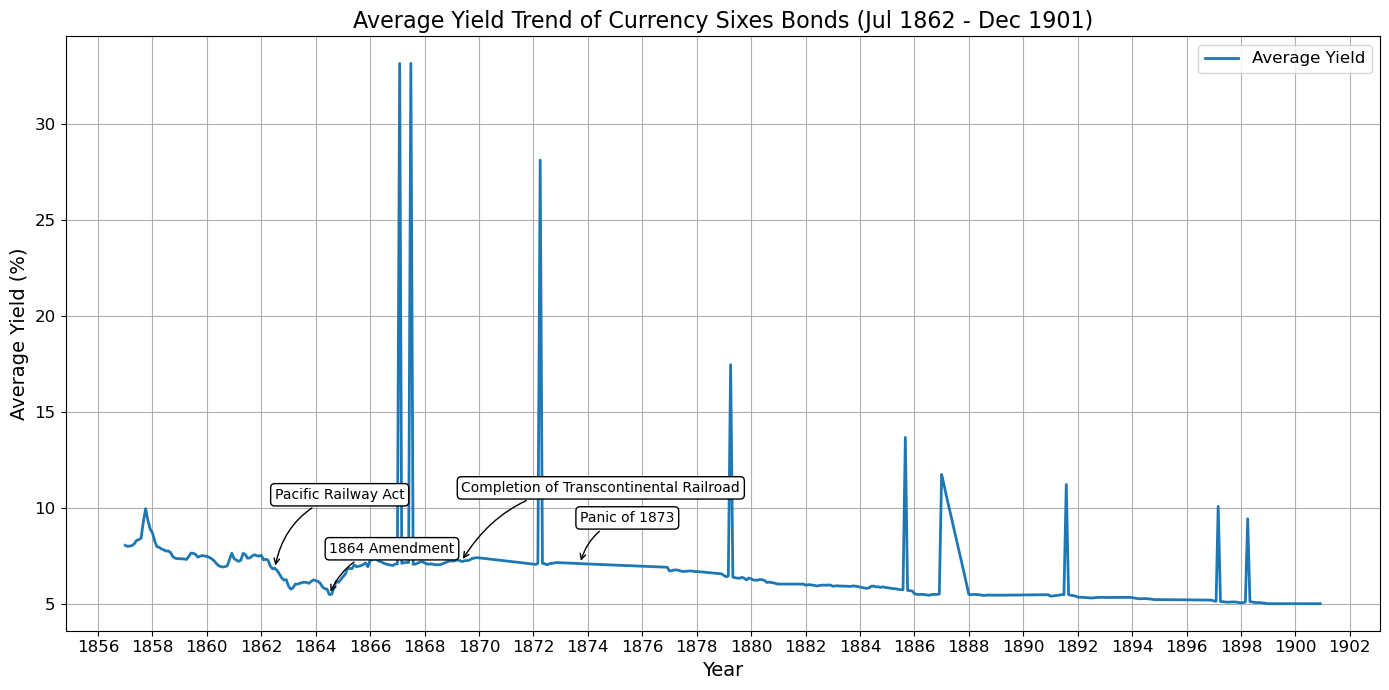

In [6]:
# function to plot average yield
def plot_average_yield():
    avg_yield = bond_yields[[col for col in bond_yields.columns if col not in ['Year', 'No.', 'Date', 'Unnamed: 89']]].mean(axis=1)
    avg_yield = avg_yield.ffill()
    plt.figure(figsize=(14, 7))
    plt.plot(bond_yields['Date'], avg_yield, label='Average Yield', linewidth=2)
    
    # custom annotations for each event
    annotations = {
        'Pacific Railway Act': {'offset': (0, 50), 'rad': 0.3},
        '1864 Amendment': {'offset': (0, 30), 'rad': 0.3}, 
        'Completion of Transcontinental Railroad': {'offset': (0, 50), 'rad': 0.3},
        'Panic of 1873': {'offset': (0, 30), 'rad': 0.3} 
    }

    for event in notable_events:
        event_date = pd.to_datetime(event['date'])
        y_pos = avg_yield[bond_yields['Date'] == event_date].values[0]
        offset = annotations[event['event']]['offset']
        rad = annotations[event['event']]['rad']

        plt.annotate(event['event'], xy=(event_date, y_pos),
                     xytext=offset, textcoords='offset points',
                     bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1),
                     arrowprops=dict(arrowstyle="->", connectionstyle=f"arc3,rad={rad}"))

    plt.title('Average Yield Trend of Currency Sixes Bonds (Jul 1862 - Dec 1901)', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Average Yield (%)', fontsize=14)
    plt.legend(loc='upper right', fontsize=12)
    plt.grid(True)
    plt.gca().xaxis.set_major_locator(YearLocator(2))
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

plot_average_yield()

## Marketability: 

The Currency Sixes were set at a first-mortgage status over government-issued bonds after 1864 amendment legislation. First-mortgage status, or first lien, meant that in the event of a default, these bonds would be paid back before government-issued bonds.

The key here was to create a more secure bond that appealed to a wider range of investors with lower risk tolerance, which increased the pool of potential buyers. By balancing the financial burden between the government and the private sector, the government could indirectly support private enterprises for the war without direct expenditure.

To raise the appeal towards investors, the federal government granted land to the railroads along the rights of way:

- 200 feet on each side of the track
- Sections 10 miles square alternating on each side



**Note:** Union Pacific had a difficult time gathering investments to repay. Ten thousand shares of $1,000 each were needed to be issued (only 10% had to be paid at the time of subscription). However, only 31 shares were established despite marketing in 24 cities.

**Example:** Railway executive Thomas C. Durant stepped in to promote shares of the Union Pacific. He put up the first installment of 10% himself and guaranteed investors against their loss on investment, eventually selling 2,177 shares by October 29, 1863.

Large private investors, usually the executive leaders of the railroads, were tasked with promoting shares of their own projects. In this way, they were able to convince their acquaintances and others potentially interested to invest.
*(Crocker, 2014), (DeMatos, 2023)*

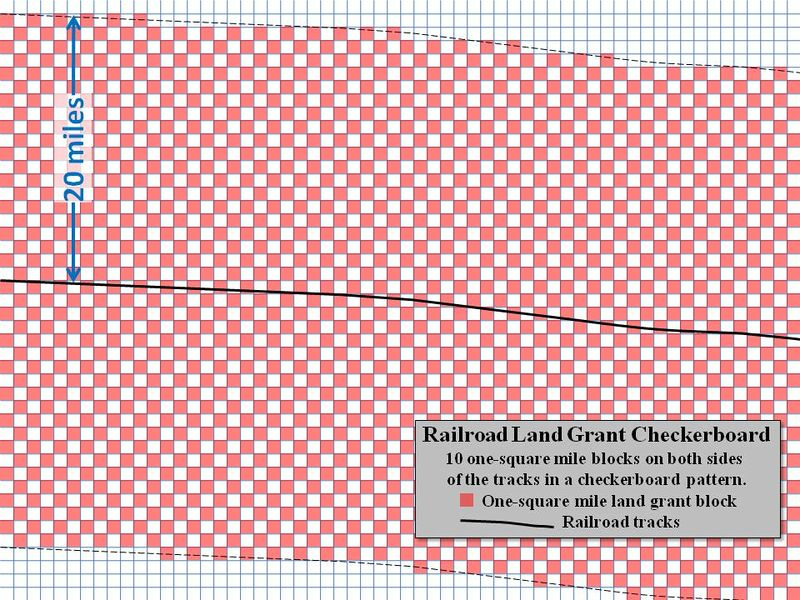

## Government Bond Pricing: 
- Each company would issue its own first-mortgage bonds for the same amount as the government bonds moving the latter into second mortgage.
- Failure to complete the tracks by January 1, 1874, resulted in forfeiture of rights.
- 'Easy Grade' in the plains was 16,000 dollars per mile.
- 'Moderate' plateau between Rocky and Sierra Nevada Mtns. was 32,000 dollars per mile.
- 'Mountainous' only mountain regions was 48,000 dollars per mile.
- The point of these prices could have been an incentive for the builders to finish the entire commissioned project instead of seeking small profits, thus creating a more sustainable source of funding for the investment.
*(Crocker, 2014), (Klein)*


## Conclusion
The Currency Sixes bonds were an important financial instrument in the history of the United States. Their role in funding the Transcontinental Railroads and their impact on the economic development of the country show the importance of these bonds in American history.

In [7]:
# plotting function to plot a graph of all the bonds' yield and price, as well as individual yields/prices
def plot_trends(view_type, bond_id=None):
    plt.figure(figsize=(14, 7))
    
    if view_type == 'Combined Price':
        for column in [col for col in bond_prices.columns if col not in ['Year', 'No.', 'Date', 'Unnamed: 89']]:
            plt.plot(bond_prices['Date'], bond_prices[column], label=f'Bond {column}', linewidth=1)
        plt.title('Price Trends of All Currency Sixes Bonds Over Time', fontsize=16)
        plt.ylabel('Price ($)', fontsize=14)
        
    elif view_type == 'Combined Yield':
        for column in [col for col in bond_yields.columns if col not in ['Year', 'No.', 'Date', 'Unnamed: 89']]:
            bond_yields[column] = bond_yields[column].fillna(method='ffill')
            plt.plot(bond_yields['Date'], bond_yields[column], label=f'Bond {column}', linewidth=1)
        plt.title('Yield Trends of All Currency Sixes Bonds Over Time', fontsize=16)
        plt.ylabel('Yield (%)', fontsize=14)
        
    elif view_type == 'Individual Price' and bond_id:
        plt.plot(bond_prices['Date'], bond_prices[bond_id], label=f'Bond {bond_id}', linewidth=2)
        plt.title(f'Price Trend of Bond {bond_id} Over Time', fontsize=16)
        plt.ylabel('Price ($)', fontsize=14)
        
    elif view_type == 'Individual Yield' and bond_id:
        plt.plot(bond_yields['Date'], bond_yields[bond_id], label=f'Bond {bond_id}', linewidth=2)
        plt.title(f'Yield Trend of Bond {bond_id} Over Time', fontsize=16)
        plt.ylabel('Yield (%)', fontsize=14)
        
    plt.xlabel('Year', fontsize=14)
    plt.legend(title='Bond ID', loc='upper right', bbox_to_anchor=(1.15, 1), fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# dropdown menu to sort through options
def display_graphs(view_type):
    if view_type in ['Combined Price', 'Combined Yield']:
        plot_trends(view_type)
    elif view_type in ['Individual Price', 'Individual Yield']:
        bond_dropdown = widgets.Dropdown(options=[col for col in bond_prices.columns if col not in ['Year', 'No.', 'Date', 'Unnamed: 89']], description='Bond ID:')
        interact(plot_trends, view_type=fixed(view_type), bond_id=bond_dropdown)

view_options = ['Combined Price', 'Combined Yield', 'Individual Price', 'Individual Yield']
view_dropdown = widgets.Dropdown(options=view_options, description='View:')
interact(display_graphs, view_type=view_dropdown)

interactive(children=(Dropdown(description='View:', options=('Combined Price', 'Combined Yield', 'Individual P…

<function __main__.display_graphs(view_type)>

## Sources
List of sources we used to write our bond biography

- BARRIGER, J. W., & McNamara, R. S. (1965). Railroads in the Civil War. National Defense Transportation Journal, 21(2), 42–48. http://www.jstor.org/stable/44097985
- Crocker, E. B. (2014, April 17). Financing America’s First Transcontinental Railroad. Beyond the History Textbooks. https://beyondthehistorytextbooks.com/2014/04/17/financing-americas-first-transcontinental-railroad/ 
- Daniel DeMatos, C. (2023b, February 27). TCH: Financing and Building Union Pacific. LinkedIn. https://www.linkedin.com/pulse/tch-financing-building-union-pacific-daniel-dematos-cfa/ 
- Fleisig, H. (1975). The Central Pacific Railroad and the Railroad Land Grant Controversy. The Journal of Economic History, 35(3), 552–566. http://www.jstor.org/stable/2119557
- Gallman, R. E., & Wallis, J. J. (1992). U. S. labor force estimates and economic growth, 1800- ... nber.org. https://www.nber.org/system/files/chapters/c8007/c8007.pdf 
- Mulopulos, S. (2024, February 20). Rediscovering the readjusters: Remembering a lost multiracial, working-class movement. American Affairs Journal. https://americanaffairsjournal.org/2024/02/rediscovering-the-readjusters-remembering-a-lost-multiracial-working-class-movement/ 
- National Archives and Records Administration. (n.d.). Pacific Railway Act (1862). National Archives and Records Administration. https://www.archives.gov/milestone-documents/pacific-railway-act 
- O’Toole, R. (2019). 150 Years of Boondoggles. Cato.org. https://www.cato.org/blog/150-years-boondoggles
- PBS. (n.d.). Collis P. Huntington. https://www.pbs.org/wgbh/americanexperience/features/tcrr-huntington/
- PBS. (n.d.). Mark Hopkins. https://www.pbs.org/wgbh/americanexperience/features/tcrr-hopkins/ 
- Poor, H. V. (1879). The Pacific Railroad. The North American Review, 128(271), 664–680. http://www.jstor.org/stable/25100767
- Ratliff, B. (n.d.). The Octopus and the Big Four. FOUNDSF. https://www.foundsf.org/index.php?title=The_Octopus_and_the_Big_Four 
- Russel, R. R. (1928). A Revaluation of the Period Before the Civil War: Railroads. The Mississippi Valley Historical Review, 15(3), 341–354. https://doi.org/10.2307/1892434
- The history of the debt. TreasuryDirect. (n.d.). https://www.treasurydirect.gov/government/historical-debt-outstanding/
- Vance, J. E. , Allen, . Geoffrey Freeman and Shedd, . Thomas Clark (2024, July 3). railroad. Encyclopedia Britannica. https://www.britannica.com/technology/railroad
- Weidenmier, M. D., & Davis, J. H. (n.d.). The macroeconomic impact of the American Civil War. atlantafed.org. https://www.atlantafed.org/blogs/-/media/CFBC939B67FA46169DA711319F15FDD2.ashx 